In [1]:
import os
import numpy as np
import h5py
os.environ['PATH'] += os.pathsep + '/home/subhajitkar/anaconda3/envs/dedalus/bin/latex/'

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc

## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['mathtext.rm'] = 'Times'

import cmocean

matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}', \
r'\usepackage{amssymb}', r'\usepackage{unicode}'] #, r'\usepackage[mathcal]{eucal}']
matplotlib.rcParams.update({'font.size': 18})

/var/folders/js/v_sxl9_s68nb6p4y4904hzkm0000gn/T/ipykernel_5990/3015727208.py:20: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}', \


In [6]:
def read_grid3d_file(filename):

    fid = h5py.File(filename, mode='r')
    x = np.array( fid['/scales/x/1.0'] )
    z = np.array( fid['/scales/z/1.0'] )
    return x, z

In [7]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

In [8]:
def read_data(folder_, fileString, start_file, end_file, var2read):
    
    data_ = []; sim_time = []
    
    for it in range(start_file, end_file+1):
        filename = folder_ + '/' + fileString + '/' + fileString + '_s' + str(it) + '.h5'
        #print(filename)
        
        fid = h5py.File(filename, mode='r')
        time = fid['/scales/sim_time']
        var = fid['/tasks/' + var2read]
        
        data_.extend(var)
        sim_time.extend(time)
        
    data_ = np.array(data_)
    sim_time = np.array(sim_time)
        
    return sim_time, data_

In [9]:
x, z = read_grid3d_file('freq_1e-3/profile/profile_s1.h5')
print('x.domain: ', x.min(), x.max())
print('z.domain: ', z.min(), z.max())
nx = len(x)
nz = len(z)

x.domain:  0.0 2.995
z.domain:  7.867967567354306e-06 0.9999921320324326


In [6]:
fileS = 'profile'
ω = 1e-3
t, u_rms = read_data('freq_1e-3', fileS, 1, 5, 'urms_global')
_,  w_rms = read_data('freq_1e-3', fileS, 1, 5, 'wrms_global')

tot_TimePeriod_end = np.int32(np.round(t[-1]*ω)) - 1
tot_TimePeriod_str = tot_TimePeriod_end - 2

_, pt1 = find_nearest(t, tot_TimePeriod_str/ω)
_, pt2 = find_nearest(t, tot_TimePeriod_end/ω)

u_rms_tavg_1 = np.mean(u_rms[pt1:pt2,:], axis=0)
w_rms_tavg_1 = np.mean(u_rms[pt1:pt2,:], axis=0)

A_1/freq_1e-3/snapshots/snapshots_s1.h5
shape:  (238, 900, 480)
tot_TimePeriod =  5
time:  4000000.1104271836
time:  4100000.0994860674
time:  4200000.3170606345
time:  4300000.317113917
time:  4400000.340529845
time:  4500000.18090846
time:  4600000.5156670185
time:  4700000.933385595
time:  4800001.132432408
time:  4900000.444919621
time:  5000000.418868205


In [7]:
ω = 1e-2
t, u_rms = read_data('freq_1e-2', fileS, 1, 5, 'urms_global')
_, w_rms = read_data('freq_1e-2', fileS, 1, 5, 'wrms_global')

tot_TimePeriod_end = np.int32(np.round(t[-1]*ω)) - 1
tot_TimePeriod_str = tot_TimePeriod_end - 2

_, pt1 = find_nearest(t, tot_TimePeriod_str/ω)
_, pt2 = find_nearest(t, tot_TimePeriod_end/ω)

u_rms_tavg_2 = np.mean(u_rms[pt1:pt2,:], axis=0)
w_rms_tavg_2 = np.mean(u_rms[pt1:pt2,:], axis=0)

A_1/freq_1e-2/snapshots/snapshots_s1.h5
tot_TimePeriod =  29
time:  280000.0722239144
time:  281000.0478569359
time:  282000.02890256775
time:  283000.00995347893
time:  284000.0301522058
time:  285000.0167720683
time:  286000.0526733439
time:  287000.00018142746
time:  288000.05202574376
time:  289000.0104034281
time:  290000.06091279176


In [8]:
ω = 1e-1
t, u_rms = read_data('freq_1e-1', fileS, 1, 5, 'urms_global')
_, w_rms = read_data('freq_1e-1', fileS, 1, 5, 'wrms_global')

tot_TimePeriod_end = np.int32(np.round(t[-1]*ω)) - 1
tot_TimePeriod_str = tot_TimePeriod_end - 2

_, pt1 = find_nearest(t, tot_TimePeriod_str/ω)
_, pt2 = find_nearest(t, tot_TimePeriod_end/ω)

u_rms_tavg_1 = np.mean(u_rms[pt1:pt2,:], axis=0)
w_rms_tavg_1 = np.mean(u_rms[pt1:pt2,:], axis=0)

A_1/freq_1e-1/snapshots/snapshots_s1.h5
tot_TimePeriod =  99
time:  9800.001557773216
time:  9808.00243249421
time:  9820.004276780784
time:  9828.002495699075
time:  9840.006263866298
time:  9848.002212978707
time:  9860.004916474525
time:  9868.00121162866
time:  9880.000714087273
time:  9888.001367742369
time:  9900.00276383428


In [9]:
ω = 1.
t, u_rms = read_data('freq_1', fileS, 1, 5, 'urms_global')
_, w_rms = read_data('freq_1', fileS, 1, 5, 'wrms_global')

tot_TimePeriod_end = np.int32(np.round(t[-1]*ω)) - 1
tot_TimePeriod_str = tot_TimePeriod_end - 2

_, pt1 = find_nearest(t, tot_TimePeriod_str/ω)
_, pt2 = find_nearest(t, tot_TimePeriod_end/ω)

u_rms_tavg_1 = np.mean(u_rms[pt1:pt2,:], axis=0)
w_rms_tavg_1 = np.mean(u_rms[pt1:pt2,:], axis=0)

A_1/freq_1/snapshots/snapshots_s1.h5
tot_TimePeriod =  499
time:  498.00003695167146
time:  498.1003766490259
time:  498.20006478990405
time:  498.3004044872585
time:  498.40009262813663
time:  498.5004323254911
time:  498.6001204663692
time:  498.7004601637237
time:  498.8001483046018
time:  498.90048800195626
time:  499.0001761428344


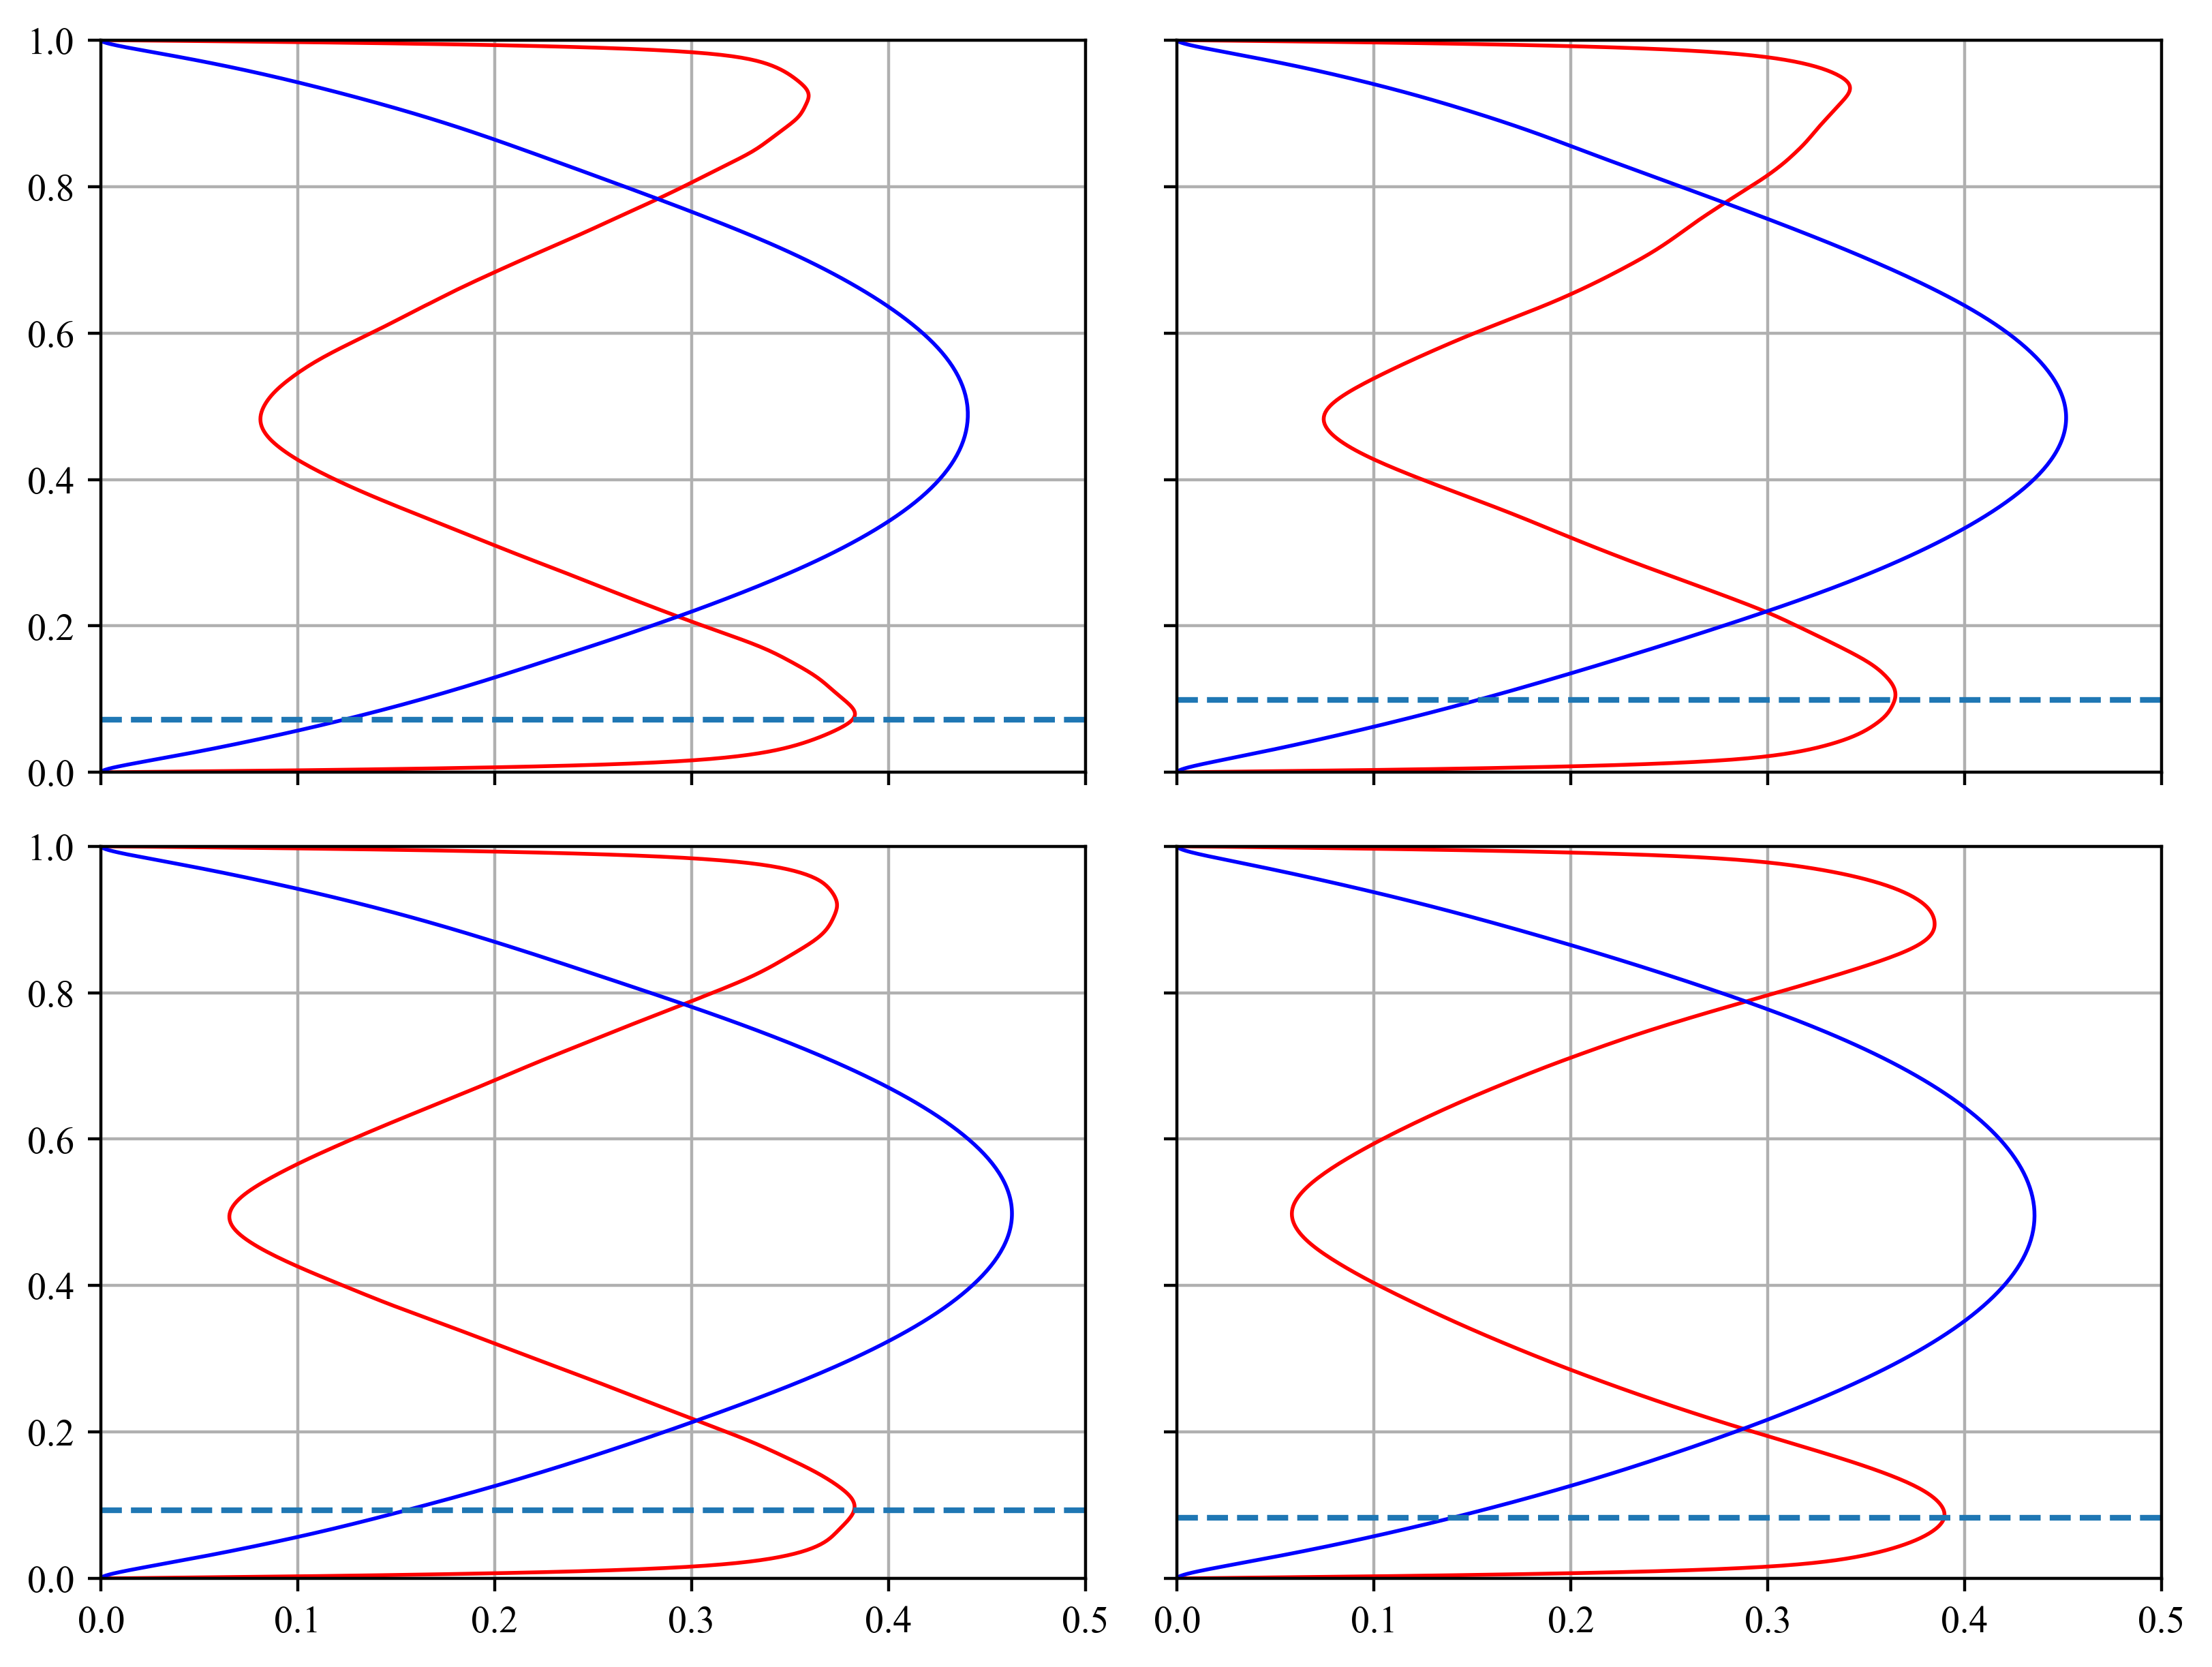

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,6), dpi=400, 
                        sharex=True, sharey=True, constrained_layout=True)

v1 = np.linspace(0, 0.5, 100)
z1_ = np.ones(100)

with plt.rc_context({"axes.spines.right": False,
    "axes.spines.top": False,}):
    
    axs[0,0].plot(u1_rms, z1, color='red',  linewidth=1)
    axs[0,0].plot(w1_rms, z1, color='blue', linewidth=1)
    axs[0,0].plot(v1, 0.072*z1_, linestyle='--', linewidth=1.5)
    
    
    axs[0,1].plot(u2_rms, z1, color='red',  linewidth=1)
    axs[0,1].plot(w2_rms, z1, color='blue', linewidth=1)
    axs[0,1].plot(v1, 0.099*z1_, linestyle='--', linewidth=1.5)
    
    axs[1,0].plot(u3_rms, z1, color='red',  linewidth=1)
    axs[1,0].plot(w3_rms, z1, color='blue', linewidth=1)
    axs[1,0].plot(v1, 0.093*z1_, linestyle='--', linewidth=1.5)
    
    axs[1,1].plot(u4_rms, z1, color='red',  linewidth=1)
    axs[1,1].plot(w4_rms, z1, color='blue', linewidth=1)
    axs[1,1].plot(v1, 0.083*z1_, linestyle='--', linewidth=1.5)
    
    axs[0,0].set_xlim([0., 0.5])
    axs[0,0].set_ylim([0., 1])
    
axs[0,0].grid()
axs[0,1].grid()
axs[1,0].grid()
axs[1,1].grid()

plt.show()

In [11]:
from scipy import interpolate

folder_ = '/atlantic/subhajitkar/Results/data/rbc2d/no_forced/Ra_1e8/'
fileString = 'snapshots'
filename = folder_ + '/' + fileString + '/' + fileString + '_s' + str(1) + '.h5'
print(filename)
x, z = read_grid3d_file(filename)

x_uni = np.linspace(x.min(), x.max(), 30)
z_uni = np.linspace(z.min(), z.max(), 10)

t1, u1 = read_h5data(folder_, fileString, 3, 5, 'u')
_,  w1 = read_h5data(folder_, fileString, 3, 5, 'w')
_,  T1 = read_h5data(folder_, fileString, 3, 5, 'T')

_, snap1 = find_nearest(t1, 500)
_, snap2 = find_nearest(t1, 500)

uvel = u1[snap1,:,:]
wvel = w1[snap1,:,:]
Temp = T1[snap1,:,:]

u_sq = uvel**2
u_sq_xavg = np.mean(u_sq, axis=0)
u_rms = np.sqrt(u_sq_xavg)

print('shape: ', np.shape(uvel))

interp_ = interpolate.interp2d(x, z, uvel.T, kind='cubic')
uvel1  = interp_(x_uni, z_uni).T
interp_ = interpolate.interp2d(x, z, wvel.T, kind='cubic')
wvel1  = interp_(x_uni, z_uni).T

u_tavg = np.mean(uvel, axis=0); u_txavg = np.mean(u_tavg, axis=0)
w_tavg = np.mean(wvel, axis=0); w_txavg = np.mean(w_tavg, axis=0)

u_xavg = np.mean(u1[snap1,:,:], axis=0)
w_xavg = np.mean(w1[snap1,:,:], axis=0)
T_xavg = np.mean(T1[snap1,:,:], axis=0)

/atlantic/subhajitkar/Results/data/rbc2d/no_forced/Ra_1e8//snapshots/snapshots_s1.h5
shape:  (800, 480)


In [12]:
# from matplotlib import cm
# levels = np.linspace( 0, 1, 51 )
# X, Z = np.meshgrid(x, z, indexing='ij')

# cnst = 1.095232820561665

# fig, ax = plt.subplots(figsize=(8,4), sharex=True, sharey=True, dpi=400)

# ax.contourf(X, Z, T1[snap1,:,:], levels=levels, cmap=cm.bwr, extend='both')
# q = ax.quiver(x_uni, z_uni, uvel1.T/cnst, wvel1.T/cnst, color='black', 
#                      width=0.005, headwidth=3., headlength=4.)

# plt.tight_layout()
# plt.savefig('Temp_freq0.png', dpi=500)
# plt.show()

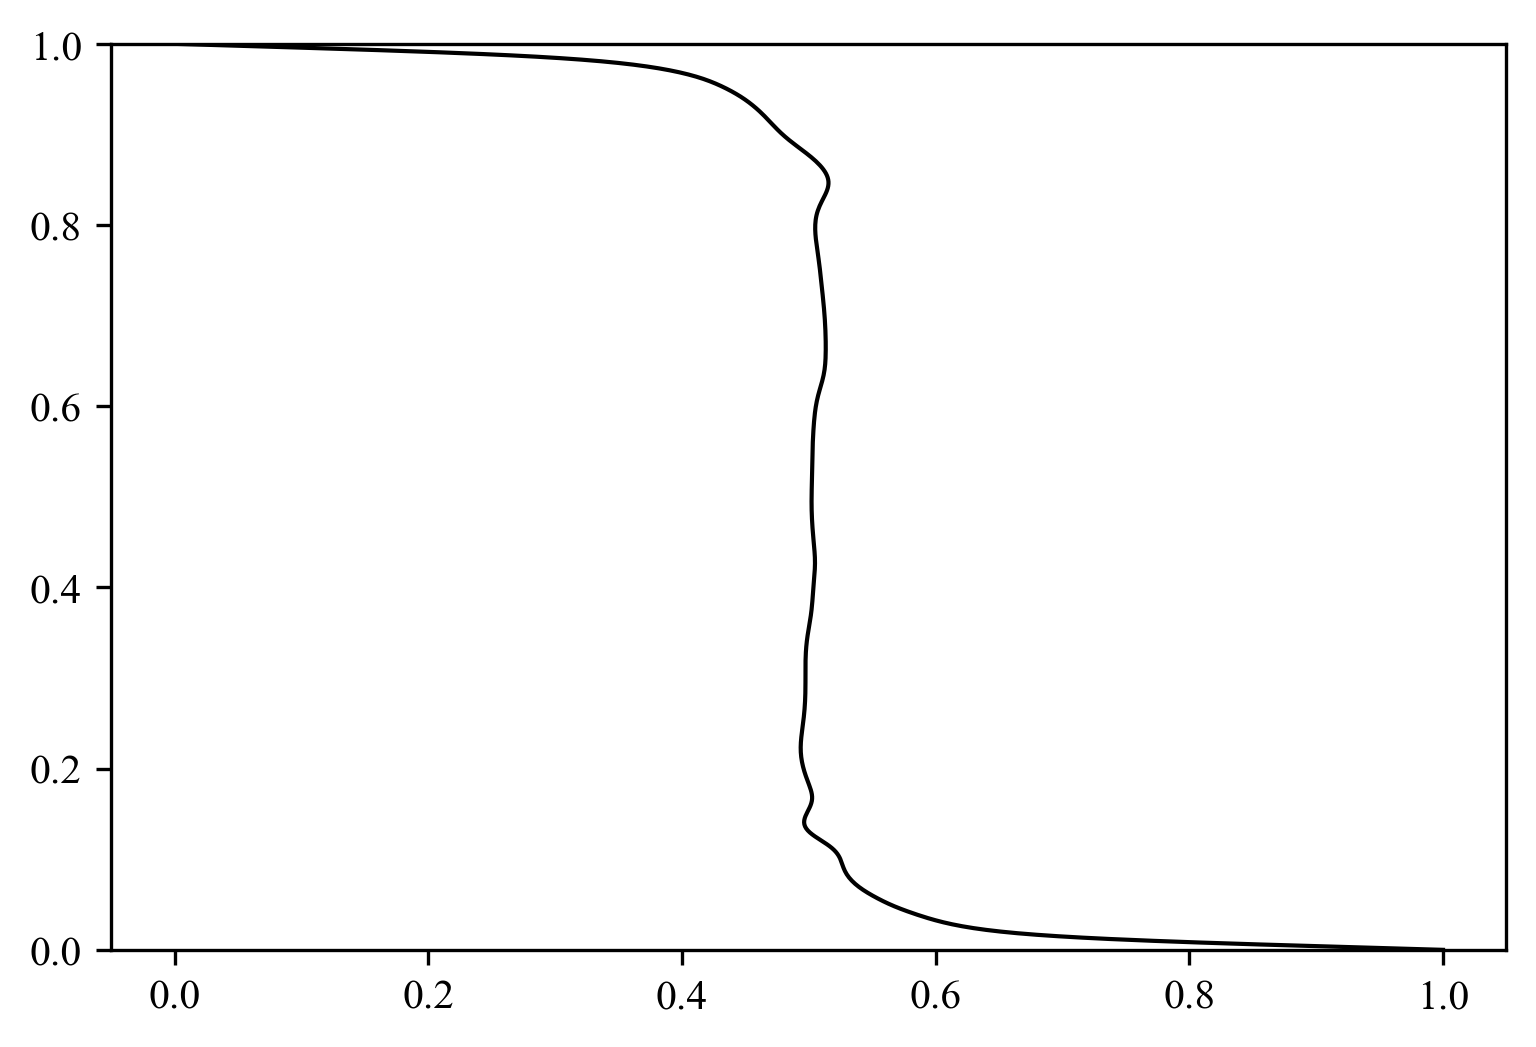

In [21]:
fig, ax = plt.subplots(dpi=300)

u = np.linspace(-0.01, 0.01, 100)
z_ = 0.02*np.ones(100)

#ax.plot(u_rms, z, color='red', linewidth=1)
ax.plot(T_xavg, z, color='black', linewidth=1)
#ax.plot(u, z_, color='black', linestyle='--', linewidth=0.5)
#ax.plot(w_txavg, z, color='blue', linewidth=1)

#plt.xlim([-0.002, 0.002])
plt.ylim([0., 1])

plt.show()